In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from time import time
import matplotlib.pyplot as plt
from zipfile import ZipFile   
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [2]:
corpus = pd.read_csv("C:/Users/user/Downloads/TA/traindata.csv")
corpus.head()

,review,label
0,starter gituu,0
1,motor matic xeon karbu kemarin mati starter ak...,0
2,saring filter karbu tenaga saring tenaga gas s...,1
3,honda matic vario esp habis oli mesin karna tu...,1
4,mesin,1


In [3]:
corpus_test = pd.read_csv("C:/Users/user/Downloads/TA/testdata.csv")
corpus_test.head()

,review,label
0,motor mio sporty setang getar,0
1,maaf mesin motor honda beat fi,1
2,kabel spul mio soul api warna om,0
3,motor karisma lampu papan monitor tanda sen la...,0
4,speedo meter mati indikator bensin ganti,0


In [4]:
x_train = corpus['review']
x_test = corpus_test['review']
y_train= corpus['label'].values
y_test = corpus_test['label'].values

In [5]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time

cvec = CountVectorizer()
lr = MultinomialNB()
n_features = np.arange(100,7001,700)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print ("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [6]:
tvec = TfidfVectorizer()


feature_result_uni = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 1))
feature_result_bi = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(2, 2))
feature_result_tri = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(3, 3))
feature_result_ubi = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))
feature_result_utri = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))
feature_result_bitri = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(2, 3))


nfeatures_plot_uni = pd.DataFrame(feature_result_uni,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bi = pd.DataFrame(feature_result_bi,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_tri = pd.DataFrame(feature_result_tri,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ubi = pd.DataFrame(feature_result_ubi,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_utri = pd.DataFrame(feature_result_utri,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bitri = pd.DataFrame(feature_result_bitri,columns=['nfeatures','validation_accuracy','train_test_time'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Validation result for 100 features
null accuracy: 52.48%
accuracy score: 82.18%
model is 29.70% more accurate than null accuracy
train and test time: 0.20s
--------------------------------------------------------------------------------
Validation result for 800 features
null accuracy: 52.48%
accuracy score: 87.13%
model is 34.65% more accurate than null accuracy
train and test time: 0.04s
--------------------------------------------------------------------------------
Validation result for 1500 features
null accuracy: 52.48%
accuracy score: 86.14%
model is 33.66% more accurate than null accuracy
train and test time: 0.04s
--------------------------------------------------------------------------------
Validation result for 2200 features
null accuracy: 52.48%
accuracy score: 86.14%
model is 33.66% more accurate than null accuracy
train and test time: 0.04s
----------------------------------------------------------------------

null accuracy: 52.48%
accuracy score: 88.12%
model is 35.64% more accurate than null accuracy
train and test time: 0.09s
--------------------------------------------------------------------------------
Validation result for 4300 features
null accuracy: 52.48%
accuracy score: 88.12%
model is 35.64% more accurate than null accuracy
train and test time: 0.07s
--------------------------------------------------------------------------------
Validation result for 5000 features
null accuracy: 52.48%
accuracy score: 88.12%
model is 35.64% more accurate than null accuracy
train and test time: 0.07s
--------------------------------------------------------------------------------
Validation result for 5700 features
null accuracy: 52.48%
accuracy score: 88.12%
model is 35.64% more accurate than null accuracy
train and test time: 0.07s
--------------------------------------------------------------------------------
Validation result for 6400 features
null accuracy: 52.48%
accuracy score: 88.12%
mod

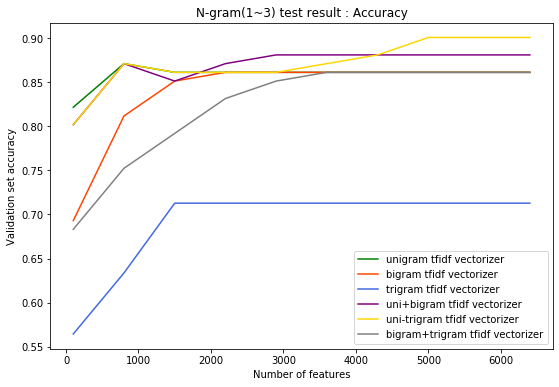

In [7]:
plt.figure(figsize=(9,6))
plt.plot(nfeatures_plot_uni.nfeatures, nfeatures_plot_uni.validation_accuracy, label='unigram tfidf vectorizer',color='green')
plt.plot(nfeatures_plot_bi.nfeatures, nfeatures_plot_bi.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_tri.nfeatures, nfeatures_plot_tri.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_ubi.nfeatures, nfeatures_plot_ubi.validation_accuracy,label='uni+bigram tfidf vectorizer',color='purple')
plt.plot(nfeatures_plot_utri.nfeatures, nfeatures_plot_utri.validation_accuracy,label='uni-trigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_bitri.nfeatures, nfeatures_plot_bitri.validation_accuracy,label='bigram+trigram tfidf vectorizer',color='grey')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")

plt.legend()
plt.savefig('./tfidf.png', format='png', dpi=2000, bbox_inches="tight")